In [6]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [7]:
def load_files(path):
    loss = np.loadtxt(path + "training_loss.txt")
    # acc = np.loadtxt(path + "training_accuracy.txt")
    acc, te_loss, te_acc,Z  = 0, 0, 0, 0
    domain = np.loadtxt(path + "domain_labels.txt")

    # te_loss = np.loadtxt(path + "testing_loss.txt")
    # te_acc = np.loadtxt(path + "testing_accuracy.txt")

    machine = np.loadtxt(path + "machine_labels.txt", dtype=str)

#     Z = np.load(path + "Z_space.npy")

    args = np.loadtxt(
        path + "arguments.txt", dtype=str, usecols=0
    )  # , delimiter = '\n')
    img_locs = np.loadtxt(path + "image_locs.txt", str)

    true_label = []
    try:
        for i in img_locs:
            true_label.append(int(i.split("/")[-2][-4]))
    except:
        print('not the same her2 path')
        print(img_locs)

    return loss, acc, te_loss, te_acc, domain, machine, true_label, Z, args, img_locs

In [130]:
ex = "../../model4_fold1/"  # enter the name of the folder where results has been saved
ex = "2022-12-06 14:27:51.855068/"
ex = '2023-03-02 13:07:12.048624/'
ex = '2023-03-02 13:37:55.204423/'
ex = '2023-03-02 14:25:35.725421/'
#________________________
ex = '2023-03-03 12:53:59.235772/' #base model zd_dim 250
ex = '2023-03-05 18:08:26.332556/'#base model zd_dim 50
ex = '../../../birds_exp/DomId/notebooks/2023-03-03 10:02:09.256589/' #DEC
# ex = '2023-03-03 13:02:23.656643/' #conditioned on class labels
# #ex = '2023-03-05 14:17:55.104317/' #conditioned on labels zd_dim is 50 
# ex = '2023-03-05 20:33:49.679337/' #conditioned on labels and previous predictions zd_dim 50
#ex = '2023-03-03 16:07:55.197608/'
number_predicted_domains = 3  # enter d_dim

In [131]:
# # #ex = '2023-03-05 14:17:55.104317/'
# # ex = '2023-03-05 14:44:45.550904/' #conditioned on her2 labelszd_dim 50
# ex = '2023-03-07 12:35:50.708342/'
# ex = '2023-03-07 23:09:32.565214/'
# ex = '2023-03-08 00:14:14.949653/'
#ex = '2023-03-08 08:42:25.305622/' #conditional final
#ex ='2023-03-08 09:54:40.881182/' #uncditional final

In [132]:
loss, acc, te_loss, te_acc, domain, machine, true_label, Z, args, img_locs = load_files(ex)

In [133]:
len(loss)

50

In [134]:
print(len(img_locs), len(machine), len(domain), len(loss))


536 536 536 50


In [135]:
loss

array([13.68092334,  4.25486173,  3.76588799,  3.73670659,  3.64598443,
        3.52987294,  3.3110762 ,  3.26045015,  3.19961572,  3.10356943,
        3.12402375,  2.95252527,  5.99526906,  7.69217597,  7.94812476,
        8.37710067,  8.93248004,  8.51452172,  8.23855411,  7.9803925 ,
        8.43436285,  8.4735078 ,  8.41753831,  8.20653395,  8.28034325,
        8.28599978,  7.99166596,  7.79586756,  7.92112685,  8.30877674,
        8.05450416,  8.09872355,  7.95881941,  7.76849697,  8.18020719,
        8.18031158,  7.54123347,  7.76431991,  7.5549322 ,  7.67956803,
        7.34062597,  7.3816307 ,  7.84498636,  7.19367192,  7.35018517,
        7.7210185 ,  7.23156123,  7.03136296,  7.34872262,  7.11765619])

In [136]:
# arguments = [str(args.aname), str(args.model), str(args.prior), str(args.zd_dim), str(args.te_d), str(args.tr_d), str(args.L), str
print(
    "Name of the exeriment: ",
    args[0],
    "\n",
    "Model: ",
    args[1],
    "\n",
    "Prior dist:",
    args[2],
    "\n",
    "Z dim: ",
    args[3],
    "\n",
    "Learning rate: ",
    args[7],
)

Name of the exeriment:  dec 
 Model:  cnn 
 Prior dist: Gaus 
 Z dim:  250 
 Learning rate:  5e-05


In [137]:
def machines_per_domain(domain, num_domains, machine, fs, experiment_name):
    """
    Following finction plots distribution of machine labels in each of the predicted clusters/domains.

    domain - predicted labels, loaded from the load function (should be integers)
    num_domain - numer of predicted doamins/clusters (one integest, same ad zd_dim)
    machine - true machine labels (strings format of the machine labels)
    fs - font size
    experiment name - title for the figure
    """
    plt.figure(figsize=(5, 5))
    FD_total = []
    H_total = []
    ND_total = []
    for i in range(1, num_domains + 1):  # ittereate through all of the domains

        ND = 0
        H1 = 0
        H2 = 0
        FD = 0

        for j in range(len(machine)):  # count machines per domain
            if domain[j] == i and machine[j] == "ND":
                ND += 1
            if domain[j] == i and machine[j] == "H1":
                H1 += 1
            if domain[j] == i and machine[j] == "H2":
                H2 += 1
            if domain[j] == i and machine[j] == "FD":
                FD += 1
        # convert numbers to proportions
        all_scanners = ND + H1 + H2 + FD
        print(all_scanners)
        FD_total.append(FD / all_scanners)
        H_total.append((H1 + H2) / all_scanners)
        ND_total.append(ND / all_scanners)

    x = np.linspace(1, num_domains+1, num=num_domains)
    x_ticks = [str(i / 2)[0] for i in x]
    plt.bar(x, FD_total, color="powderblue")
    plt.bar(x, H_total, bottom=FD_total, color="cadetblue")
    plt.bar(x, ND_total, bottom=np.add(FD_total, H_total), color="teal")

    # plt.legend(['FD scanner','H scanner', 'ND scanner'], fontsize=fs-10)
    counter = 0
    for i in x:
        plt.text(
            i - 0.65, FD_total[counter] / 2, str(FD_total[counter])[:4], fontsize=fs
        )
        plt.text(
            i - 0.65,
            FD_total[counter] + (H_total[counter]) / 2,
            str(H_total[counter])[:4],
            fontsize=fs,
        )
        plt.text(
            i - 0.65,
            FD_total[counter] + H_total[counter] + ND_total[counter] / 5,
            str(ND_total[counter])[:4],
            fontsize=fs,
        )
        counter += 1

    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    # y = [0, 0.5, 1]
    # y_ticks = [0, 0.5, 1]
    plt.ylim(0, 1.025)
    plt.tick_params(left = False, labelleft = False)
    
    #plt.yticks(y, y_ticks, fontsize = fs)
    plt.xlabel("Domain", fontsize=fs)
   
  

    plt.show()

185
179
172


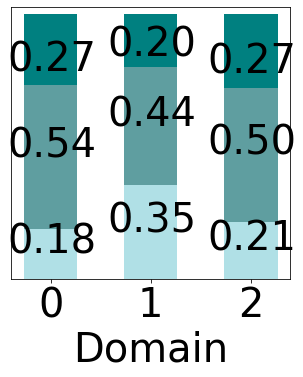

In [138]:
machines_per_domain(domain, number_predicted_domains, machine,40, "")

In [139]:
def class_per_domain(class_label, num_domains, domain, fs, experiment_name):
    """
    Following finction plots distribution of machine labels in each of the predicted clusters/domains.

    class_label - true class labels
    num_domain - numer of predicted doamins/clusters (one integest, same ad zd_dim)
    domain - predicted labels, loaded from the load function (should be integers)
    fs - font size
    experiment name - title for the figure

    """
    plt.figure(figsize=(5, 5))

    counter = 0
    class_d = []
    C1 = []
    C2 = []
    C3 = []
    all_per_domain = []

    for i in range(1, num_domains + 1):  # itterate through domain numbers

        class1 = 0
        class2 = 0
        class3 = 0

        for j in range(len(class_label)):  # itterate throou all samples
            # print(i, j, class_label[j], domain[j])
            if class_label[j] == 1.0 and domain[j] == i:
                class1 += 1
            if class_label[j] == 2.0 and domain[j] == i:
                class2 += 1
            if class_label[j] == 3.0 and domain[j] == i:
                class3 += 1

        all_classes = class1 + class2 + class3
        C1.append(class1 / all_classes)
        C2.append(class2 / all_classes)
        C3.append(class3 / all_classes)
        all_per_domain.append(class1 + class2 + class3)

    x = np.linspace(1, num_domains+1, num=num_domains)
    x_ticks = [str(i / 2)[0] for i in x]
    plt.bar(x, C1, color="pink")
    plt.bar(x, C2, bottom=C1, color="palevioletred")
    plt.bar(x, C3, bottom=np.add(C1, C2), color="#8B2252")
    for i in x:
        plt.text(i - 0.65, 3 * C1[counter] / 4, str(C1[counter])[:4], fontsize=fs)
        plt.text(
            i - 0.65, C1[counter] + 3*C2[counter] / 4, str(C2[counter])[:4], fontsize=fs
        )
        plt.text(i - 0.65, 1 - 1 * C3[counter] / 2, str(C3[counter])[:4], fontsize=fs)
        counter += 1
    #plt.legend(["HER2 Class 1", "HER2 Class 2", "HER2 Class 3"], fontsize=fs - 10)

    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    # y = [0, 0.5, 1]
    # y_ticks = [0, 0.5, 1]
    # plt.yticks(y, y_ticks, fontsize = fs)
    plt.tick_params(left = False, labelleft = False)
    plt.ylim(0, 1.025)
    plt.show()

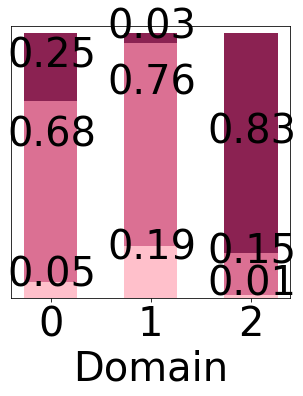

In [140]:
class_per_domain(true_label, number_predicted_domains, domain, 40, "")

In [141]:
# Seperate predicted domains by numbers. All predicted 1s are in d1, etc....
d1 = []
d2 = []
d3 = []
d4 = []
for i in range(len(domain)):

    if domain[i] == 1:
        d1.append(img_locs[i])
    if domain[i] == 2:
        d2.append(img_locs[i])
    if domain[i] == 3:
        d3.append(img_locs[i])
    if domain[i] == 4:
        d4.append(img_locs[i])

In [142]:
#import cv2
import torchvision

In [116]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num, N, base_path="../"):
    plt.figure(figsize=(45, 20))
    for j in range(1, N):
        d_path = d[j] if d[j].startswith("/") else base_path + d[j]
        img = torchvision.io.read_image(d_path)
        plt.subplot(1, N, j)
        plt.imshow(img.permute(1, 2, 0))
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        print(d[j])
        name = d[j].split("/")
        title = name[-2][:-3] + " " + name[-1][-6:-4]
        plt.title(title, fontsize=100)
        if j == 1:
            plt.ylabel("Domain " + str(num), fontsize=100, fontweight="bold")
    plt.show()

../../DomId/HER2/combined_train/class3jpg/s06-8342-71049-14108H1.jpg
../../DomId/HER2/combined_train/class2jpg/S03-9040-9255-16857H2.jpg
../../DomId/HER2/combined_train/class2jpg/S05-1147-7500-6033H1.jpg


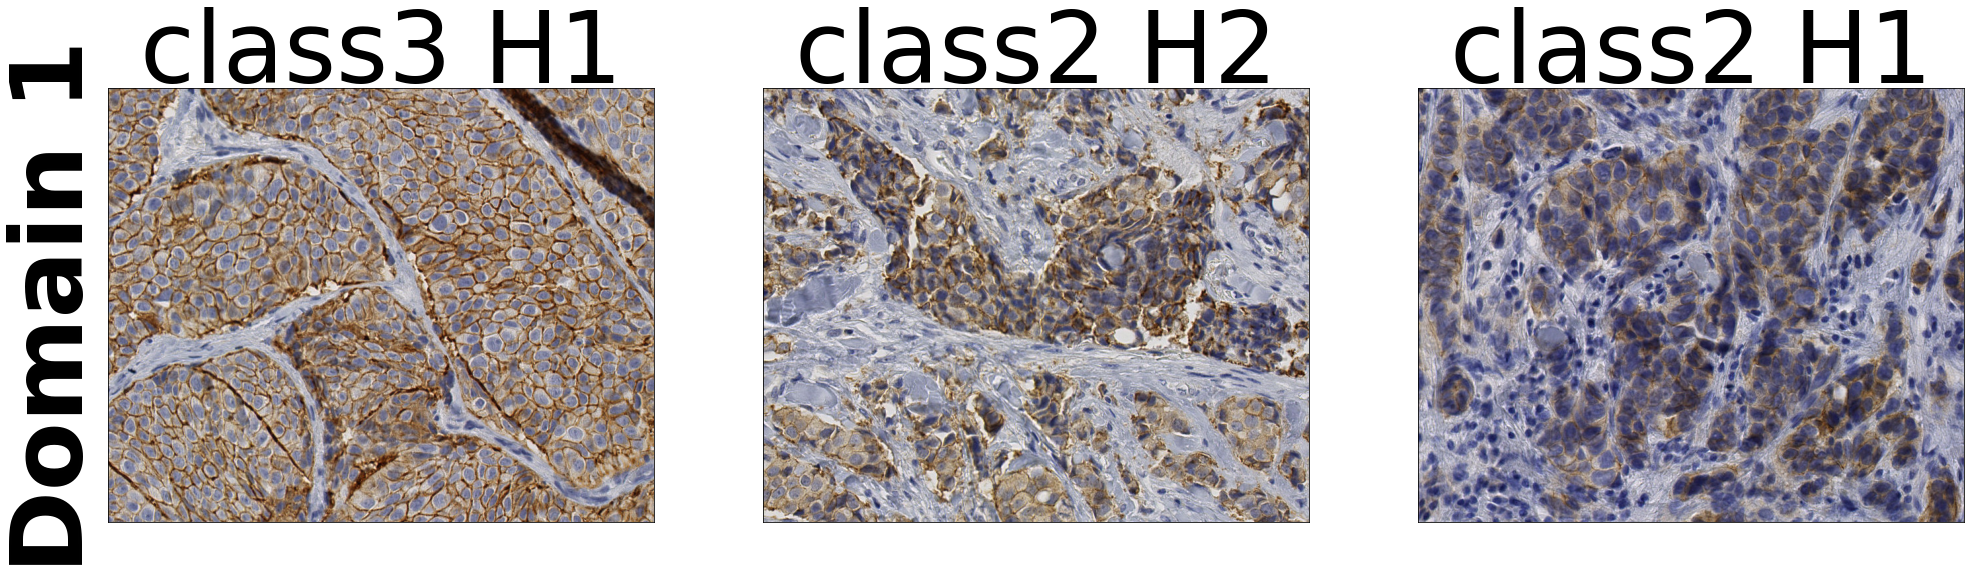

In [117]:
vizualize_images_per_domain(d1, 1, 4)

# vizualize_images_per_domain(d4, 4, 5)

../../DomId/HER2/combined_train/class2jpg/6501-1FD.jpg
../../DomId/HER2/combined_train/class2jpg/s06-5870-38338-10548FD.jpg
../../DomId/HER2/combined_train/class3jpg/S04-9969-15667-16223H2.jpg


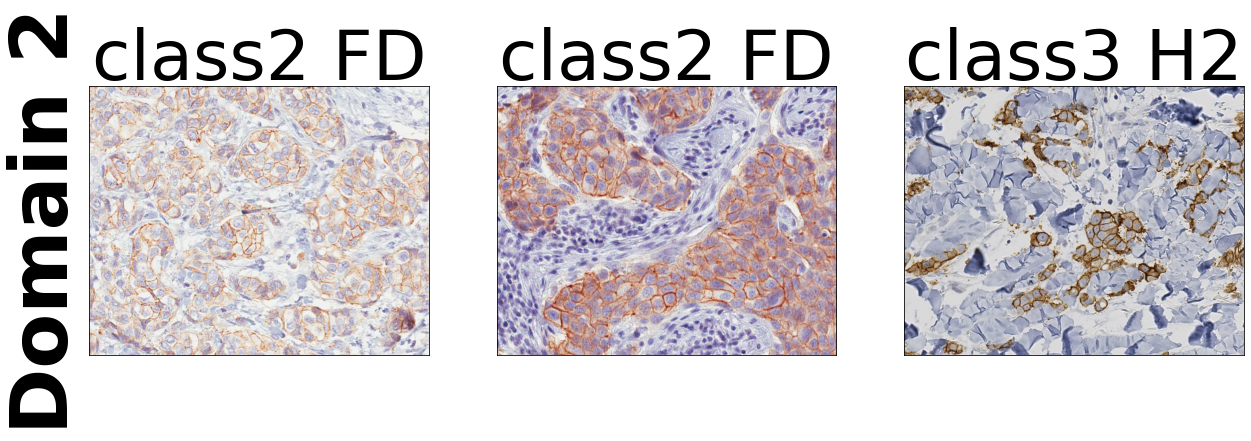

In [381]:
vizualize_images_per_domain(d2, 2, 4)


../../DomId/HER2/combined_train/class2jpg/S05-1147-15152-10139ND.jpg
../../DomId/HER2/combined_train/class3jpg/s06-7990-61014-21433ND.jpg
../../DomId/HER2/combined_train/class3jpg/s05-555-18638-7616H1.jpg


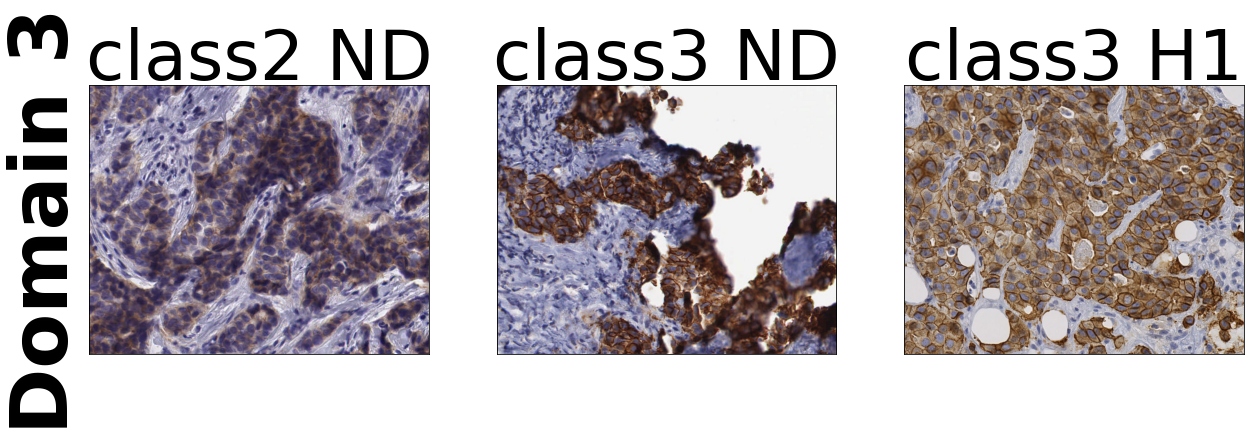

In [382]:
vizualize_images_per_domain(d3, 3, 4)

# Scores Analysis 

In [149]:
def mean_scores_per_experiment(scores, img_locs):
    """
    Parser to get mean scores per image from the cvs file.
    The name of the images in the folders are slightly different from the names in the csv file.

    """

    M = []

    for prediction in img_locs:
        try:
            prediction = str(
                prediction.split("/")[-1]
            )  # depending if the path is full or not, take the img name only
        except:
            "not full path"

        if "s" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        if "S" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        else:
            N = len(prediction) - 6
            # print('secod case', N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
            # print(mean_score)
        mean_score = float(mean_score)
        # print(mean_score)
        M.append(mean_score)
    return M

In [150]:
def box_plot_per_domain(domain, M, fs, c, title, up, true_ex=False):
    """
    Box plot for median scores
    domain - predicted domain
    M - corresponding mean scores
    c - color fill for the box plot
    title - title of the experiment
    up - vertical displacement of the text
    true_ex  - if ground truth values (not domain, but true labels are inputted)

    """
    data1 = []
    data2 = []
    data3 = []
    # data4 = []

    for i in range(len(domain)):
        if domain[i] == 1:
            data1.append(M[i])
        if domain[i] == 2:
            data2.append(M[i])
        if domain[i] == 3:
            data3.append(M[i])
    #         if domain[i] ==4:
    #             data4.append(M[i])

    data = [data1, data2, data3]
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c, color='black'))

    ax.text(
        0.85,
        np.mean(data[0]) + up,
        str(np.mean(data[0]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        1.85,
        np.mean(data[1]) + up,
        str(np.mean(data[1]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        2.85,
        np.mean(data[2]) + up,
        str(np.mean(data[2]))[:5],
        color="black",
        fontsize=fs,
    )

    plt.xlabel("Domain", fontsize=fs)
    plt.ylabel("HER2/neu Scores", fontsize=fs)
    plt.title(title, fontsize=fs, weight = 'bold')
    plt.xticks(fontsize=fs, weight="bold")
    plt.yticks(fontsize=fs - 5)
    if true_ex == True:
        plt.xticks([1, 2, 3], ["FD", "H", "ND"], fontsize=fs)
        plt.title("Original Dataset:" + title, fontsize=fs)
    plt.show()

In [151]:
import pandas as pd

base_path = "../../../DomId/HER2"
# base_path = "/your/data/location"
print(os.listdir(base_path))
scores = pd.read_csv(
    os.path.join(base_path, "truthfile_002.csv"),
    names=["num", "file name", "s1", "s2", "s3", "s4", "s5", "s6", "s_7"],
)

['combined_train', 'truthfile_002.csv']


In [152]:
ex = "../../model4_fold1/"  # enter the name of the folder where results has been saved
ex = "2022-12-06 14:27:51.855068/"
ex = '2023-03-02 13:07:12.048624/'
ex = '2023-03-02 13:37:55.204423/'
ex = '2023-03-02 14:25:35.725421/'
#________________________"
ex1 = '2023-03-03 12:53:59.235772/' #base model
ex1 = '2023-03-05 18:08:26.332556/'
ex1 = '2023-03-08 01:03:53.548834/'
ex1 = '2023-03-08 07:47:20.143817/'
ex1 = '2023-03-08 08:52:32.895156/'
ex1 ='2023-03-08 09:06:46.594428/'
ex1 = '2023-03-08 09:27:01.093276/'
#ex = '2023-03-08 09:27:01.093276/'
ex1 = '2023-03-08 09:54:40.881182/'
#ex1 = '../../../birds_exp/DomId/notebooks/2023-03-03 10:02:09.256589/' #DEC
#ex2 = '2023-03-03 13:02:23.656643/' #conditioned on class labels
# number_predicted_domains = 3  # enter d_dim
colors = ["powderblue","cadetblue", "teal" ]

In [153]:
# #ex1 = '2023-03-04 19:12:09.293129/'
# #ex1 = '2023-03-04 19:50:17.884698/'


In [154]:
_, _, _, _, domain1, *_, img_locs1 = load_files(ex1)

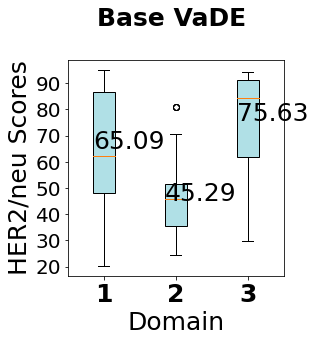

In [155]:
M1 = mean_scores_per_experiment(scores, img_locs1)
box_plot_per_domain(domain1, M1, 25, "powderblue", "Base VaDE \n ", False)

In [156]:
ex2 = '../../../birds_exp/DomId/notebooks/2023-03-03 10:02:09.256589/'

In [157]:
_, _, _, _, domain2, *_, img_locs2 = load_files(ex2)

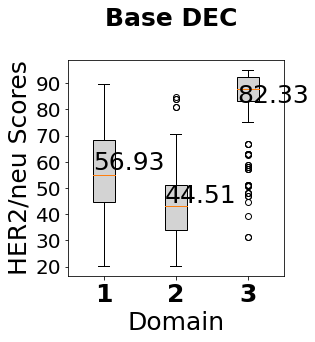

In [158]:


M2 = mean_scores_per_experiment(scores, img_locs2)
box_plot_per_domain(
    domain2,
    M2,
    25,
    "lightgrey",
    "Base DEC \n ",
    False,
)

In [159]:
ex3 = '2023-03-03 13:02:23.656643/' #conditioned on class labels
ex3 = '2023-03-05 14:44:45.550904/'
# ex = '2023-03-07 11:26:02.377406/' # random seed 2 

# ex3 = '2023-03-07 12:35:50.708342/'
#ex = '2023-03-07 12:35:50.708342/'
#ex3 = '2023-03-07 23:09:32.565214/'
#ex3 = '2023-03-08 00:14:14.949653/'
ex3 = '2023-03-08 01:03:30.084354/'
ex3 = '2023-03-08 07:41:09.665462/'
ex3= '2023-03-08 07:47:20.143817/'
ex3 = '2023-03-08 08:42:25.305622/'

In [160]:
_, _, _, _, domain3, *_, img_locs3 = load_files(ex3)

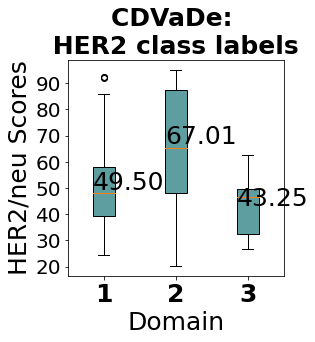

In [161]:


M3 = mean_scores_per_experiment(scores, img_locs3)
box_plot_per_domain(
    domain3,
    M3,
    25,
    "cadetblue",
    "CDVaDe: \n HER2 class labels ",
    False,
)

In [276]:
ex4 = '2023-03-03 14:43:58.573690/' #conditioned on class labels
ex4 = '2023-03-05 20:33:49.679337/'
#ex4 = '2023-03-07 11:24:28.897012/' #condiioned on the class labels and conditionally predicted lables 

In [277]:
_, _, _, _, domain4, *_, img_locs4 = load_files(ex4)

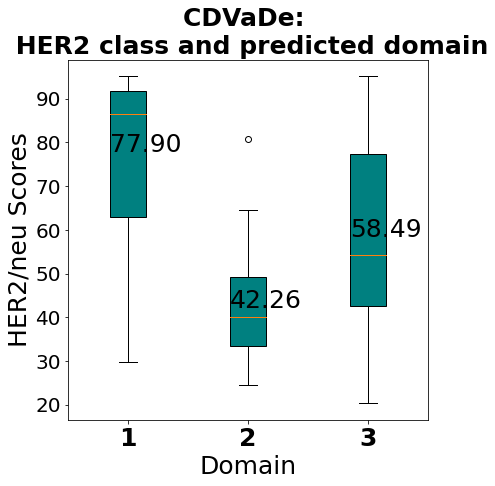

In [278]:


M4 = mean_scores_per_experiment(scores, img_locs4)
box_plot_per_domain(
    domain4,
    M4,
    25,
    "teal",
    "CDVaDe: \n HER2 class and predicted domain",
    False,
)

In [279]:

_, _, _, _, domain1, *_, img_locs1 = load_files(ex1)
_, _, _, _, domain3, *_, img_locs3 = load_files(ex3)

In [280]:
domain3

array([2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1.,
       2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
       2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
       2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 3.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1.,
       2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
       1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2.,
       2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 3., 1.,
       2., 2., 2., 2., 3., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1.,
       1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
       1., 1., 2., 1., 2.

(array([420.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0.,  74.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

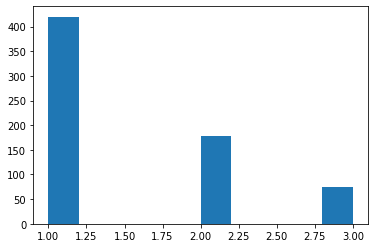

In [281]:
plt.hist(domain1)

(array([209.,   0.,   0.,   0.,   0., 447.,   0.,   0.,   0.,  16.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

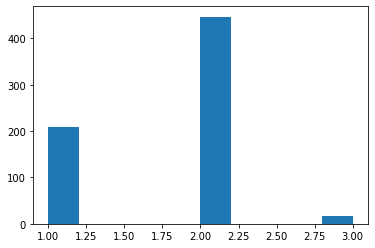

In [283]:
plt.hist(domain3)

(array([185.,   0.,   0.,   0.,   0., 179.,   0.,   0.,   0., 172.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

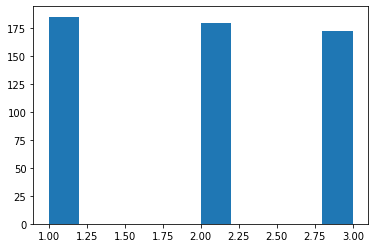

In [290]:
plt.hist(domain2)

In [201]:
M3 = mean_scores_per_experiment(scores, img_locs3)

In [202]:
M1 = mean_scores_per_experiment(scores, img_locs1)

In [203]:
M4 = mean_scores_per_experiment(scores, img_locs4)

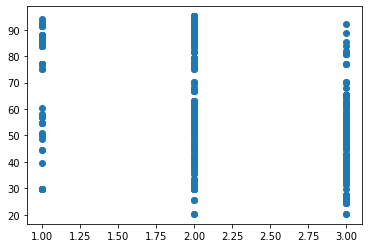

In [204]:
plt.scatter(domain1, M1)

In [205]:
r = np.corrcoef(domain1, M1)

In [206]:
r

array([[ 1.        , -0.48230061],
       [-0.48230061,  1.        ]])

In [207]:
r = np.corrcoef(domain3, M3)

In [208]:
r

array([[1.        , 0.29585604],
       [0.29585604, 1.        ]])

In [209]:
r = np.corrcoef(domain4, M4)

In [210]:
r

array([[ 1.        , -0.30004085],
       [-0.30004085,  1.        ]])

In [284]:
def domain_class_mapping(domain):
    dic1 = {1: 1, 2: 2, 3: 3}
    dic2 = {1: 1, 2: 3, 3: 2}
    dic3 = {1: 2, 2: 1, 3: 3}
    dic4 = {1: 2, 2: 3, 3: 1}
    dic5 = {1: 3, 2: 2, 3: 1}
    dic6 = {1: 3, 2: 1, 3: 2}
    dictionaries = [dic1, dic2, dic3, dic4, dic5, dic6]
    combos = []
    for i in range(0, 6):
        mapping = dictionaries[i]
        new_combination =[]
        for j in domain:
            new_combination.append(mapping[j])
        combos.append(new_combination)
            
        
    return combos

In [285]:
combos = domain_class_mapping(domain1)

In [286]:
combos = domain_class_mapping(domain1)
for i in combos:
    r =  np.corrcoef(i, M1)
    print(r)

[[ 1.         -0.06473891]
 [-0.06473891  1.        ]]
[[ 1.         -0.36291533]
 [-0.36291533  1.        ]]
[[1.         0.45914302]
 [0.45914302 1.        ]]
[[ 1.         -0.45914302]
 [-0.45914302  1.        ]]
[[1.         0.06473891]
 [0.06473891 1.        ]]
[[1.         0.36291533]
 [0.36291533 1.        ]]


In [287]:
combos2 = domain_class_mapping(domain2)
for i in combos2:
    r =  np.corrcoef(i, M2)
    print(r)

[[1.         0.47263946]
 [0.47263946 1.        ]]
[[ 1.       -0.232792]
 [-0.232792  1.      ]]
[[1.         0.71358629]
 [0.71358629 1.        ]]
[[ 1.         -0.71358629]
 [-0.71358629  1.        ]]
[[ 1.         -0.47263946]
 [-0.47263946  1.        ]]
[[1.       0.232792]
 [0.232792 1.      ]]


In [288]:
combos3 = domain_class_mapping(domain3)

In [289]:
for i in combos3:
    r =  np.corrcoef(i, M3)
    print(r)

[[1.         0.29585604]
 [0.29585604 1.        ]]
[[1.         0.38702387]
 [0.38702387 1.        ]]
[[ 1.         -0.39543686]
 [-0.39543686  1.        ]]
[[1.         0.39543686]
 [0.39543686 1.        ]]
[[ 1.         -0.29585604]
 [-0.29585604  1.        ]]
[[ 1.         -0.38702387]
 [-0.38702387  1.        ]]


In [ ]:
combos4 = domain_class_mapping(domain4)

In [ ]:
for i in combos4:
    r =  np.corrcoef(i, M4)
    print(r)

In [ ]:
dic3 = {1: 2, 2: 1, 3: 3} # same dictionary as the one that gives highest r for domain 1

In [ ]:
new_domain3 =[]
for i in domain3:
    new_domain3.append(dic3[i])

In [ ]:
r =  np.corrcoef(new_domain3, M3)

In [ ]:
r

In [ ]:
r =  np.corrcoef(domain1, domain3)

In [ ]:
r

In [ ]:
cost_mat = np.zeros((4,4))

In [ ]:
for i in range(0, len(domain1)):
 
    if domain1[i] ==1 and domain3[i]==1:
        cost_mat[1, 1]+=1
    if domain1[i] ==1 and domain3[i]==2:
        cost_mat[1, 2]+=1
    if domain1[i] ==1 and domain3[i]==3:
        cost_mat[1, 3]+=1
    if domain1[i] ==2 and domain3[i]==1:
        cost_mat[2, 1]+=1
    if domain1[i] ==2 and domain3[i]==2:
        cost_mat[2, 2]+=1
    if domain1[i] ==2 and domain3[i]==3:
        cost_mat[2, 3]+=1
    if domain1[i] ==3 and domain3[i]==1:
        cost_mat[3, 1]+=1
    if domain1[i] ==3 and domain3[i]==2:
        cost_mat[3, 2]+=1
    if domain1[i] ==3 and domain3[i]==3:
        cost_mat[3,3]+=1

In [ ]:
cost_mat = cost_mat[1:, 1:]

In [ ]:
cost_mat

In [92]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
#scp_assignment = linear_sum_assignment(cost_mat)

In [ ]:
img_locs1[:5]

In [ ]:
new_domain3 = []
for i in img_locs1:
    indx =np.where(img_locs3 == i)
    new_domain3.append(domain3[indx].item())
    #print(new_domain3)
    

In [93]:

new_domain2 = []
new_domain1 = []
new_domain3 = []
counter = 0
for i in img_locs1:
    
    try:
        
        indx =np.where(img_locs2 == i)
        indx_d3 =np.where(img_locs3 == i)
        
        new_domain2.append(domain2[indx].item())
        new_domain1.append(domain1[counter].item())
        new_domain3.append(domain3[indx_d3].item())
        
    except:
        print(i)
    counter+=1
    
    #print(new_domain3)
    

../../DomId/HER2/combined_train/class2jpg/S04-6537-21861-21344ND.jpg
../../DomId/HER2/combined_train/class1jpg/S03-3203-9116-9572H2.jpg
../../DomId/HER2/combined_train/class3jpg/s06-560-20595-14830ND.jpg
../../DomId/HER2/combined_train/class2jpg/s06-8072-9131-7262H1.jpg
../../DomId/HER2/combined_train/class3jpg/s05-555-20006-15153FD.jpg
../../DomId/HER2/combined_train/class3jpg/s04-7735-26037-31810FD.jpg
../../DomId/HER2/combined_train/class2jpg/S03-7771-33183-21230H1.jpg
../../DomId/HER2/combined_train/class2jpg/s06-2733-23830-24073H1.jpg
../../DomId/HER2/combined_train/class2jpg/s06-4441-2138-28904FD.jpg
../../DomId/HER2/combined_train/class2jpg/s06-8341-60670-28874ND.jpg
../../DomId/HER2/combined_train/class2jpg/s06-8072-61067-29137H2.jpg
../../DomId/HER2/combined_train/class3jpg/s06-5870-9821-28258ND.jpg
../../DomId/HER2/combined_train/class3jpg/S05-1147-24682098H1.jpg
../../DomId/HER2/combined_train/class3jpg/s04-4066-5174-10777FD.jpg
../../DomId/HER2/combined_train/class3jpg/S04-

In [94]:
len(new_domain3)

536

In [291]:
cost = np.zeros((3,3))
cluster_pred_scalar = domain3#.cpu().numpy().argmax(axis=1)
cluster_true_scalar = domain1 #.cpu().numpy().argmax(axis=1)
cost = cost - confusion_matrix(cluster_pred_scalar, cluster_true_scalar) #, labels=list(range(model_local.d_dim)))

# list_vec_preds.append(pred)
# list_vec_labels.append(d_s)


# The domain label are never used in training. so we need to find
# correspondence between predicted and true domain indices. See top of
# this file for an explanation.

# What is the best permutation?
row_ind, col_ind = linear_sum_assignment(cost)
# Note that row_ind will be equal to [0, 1, ..., cost.shape[0]] because cost is a square matrix.
conf_mat = (-1)*cost[:, col_ind]
# Accuracy for best permutation:
acc_d = np.diag(conf_mat).sum() / conf_mat.sum()
print(acc_d)

0.4880952380952381


In [292]:
cost = np.zeros((3,3))
cluster_pred_scalar = new_domain2#.cpu().numpy().argmax(axis=1)
cluster_true_scalar = new_domain1 #.cpu().numpy().argmax(axis=1)
cost = cost - confusion_matrix(cluster_pred_scalar, cluster_true_scalar) #, labels=list(range(model_local.d_dim)))

# list_vec_preds.append(pred)
# list_vec_labels.append(d_s)


# The domain label are never used in training. so we need to find
# correspondence between predicted and true domain indices. See top of
# this file for an explanation.

# What is the best permutation?
row_ind, col_ind = linear_sum_assignment(cost)
# Note that row_ind will be equal to [0, 1, ..., cost.shape[0]] because cost is a square matrix.
conf_mat = (-1)*cost[:, col_ind]
# Accuracy for best permutation:
acc_d = np.diag(conf_mat).sum() / conf_mat.sum()
print(acc_d)

0.5
